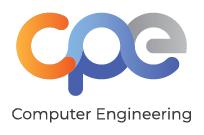

# Assignment6 Map

### สิ่งที่ได้เรียนจากคลาสนี้

* Data Structure ประเภท Map หรือ Dictionary ภาษา Python หมายถึง Data Structure ที่เก็บข้อมูล และสามารถอ้างอิงข้อมูล value ได้จาก key
* การเข้าถึงข้อมูลของ Dictionary จริงๆแล้วเหมือนกับการที่เราเข้าถึง List 2 ตัวพร้อมกัน คือ List ของ key และ index กับ List index และ value
* เนื่องจากการเข้าถึงมันต้องอ้างอิงผ่าน key มาก่อน บางครั้งจึงทำให้ใช้เวลานาน แต่ถ้าหากเราใช้คอนเซปที่ว่า เราแปลงให้ค่า key คล้ายกับค่า index ที่ใช้อ้างอิงใน List ก็คือป้อนค่า Key แล้วอ้างอิงถึง value ได้ทันทีเลย จึงเกิดเป็น Hash Table ขึ้นมา ซึ่งมี Time Complexity ใกล้กับ O(1)

* Hash table จะมีการทำงานเรียกว่า Hash Function หลักการพื้นฐานของ Hash Function คือ
1. ต้องเขียนง่ายๆ
2. ป้อน Key เข้าไปต้องได้ค่าเดิม ไม่ใช่ ค่า Random
3. ถ้าหาก Key มี Value หลายตัว จะต้องได้ข้อมูลออกมาทั้งหมดทุกตัว
4. ขนาดของ Table ควรจะเป็น เลขจำนวนเฉพาะ เพราะการกระจายข้อมูลจะดีกว่า
* Hash Function ประกอบด้วย 2 ส่วนหลักๆ คือ Hash code และ Compression Function
* Hash code ทำหน้าที่ แปลง Key เป็นเลข Generate ตัวเลขออกมาให้กระจายตัวกัน เช่น Polynomial Hash code , Cyclic-Shift Hash code
* Compression Function คือการทำให้ตัวเลขที่ผ่าน Hash code อยู่ในช่วงขนาดของ Table Size เช่น MAD Method (ตัวเลขใดๆถูก mod จะมี range ไม่เกิน mod)

* Collision หรือการชน เกิดจากการที่มี 2 Key ขึ้นไป ได้ Generate ค่า Hash value ออกมาเป็นตัวเดียวกัน ทำให้เกิดการชนของข้อมูล เพราะที่ว่างเต็ม อาจทำให้ข้อมูลสูญหาย เราจึงมีวิธีการจัดการอยู่สองเทคนิค ได้แก่
1. Open Addressing คือเมื่อห้องนั้นเต็มแล้ว ให้ทำการเลื่อน Key ให้ไปอยู่ในช่องถัดไป ไล่ไปทีละช่องจนกว่าจะเจอช่องที่ว่าง
2. Seperate Chaining คือการทำให้ในช่องของข้อมูลเก็บเป็น list หรือเรียกว่า bucket คล้ายๆกับคอนโด

* Load Factor คือ อัตราส่วนที่บอกจำนวนข้อมูลที่มีอยู่ ต่อ Capacity ของ Hash Table (หรือ Table Size)
* โดยปกติแล้ว Seperate Chaining จะรักษา Load Factor ให้น้อยกว่า 0.9 และ Open Addressing รักษาไว้ที่ Load Factor น้อยกว่า 0.5

**The Map ADT**

A map represents a collection that unique *keys* are mapped to associated *values*.
| properties/methods    | description    |
| --- | --- |  
| __Map()__: | Create a new Map |
| __M[k]__: | Return the value *v* associated with key *k* in map *M*, if one exists; otherwise raise a KeyError. In Python, this is implemented with the special method \_\_getitem\_\_ .|
| __M[k] = v__ | Associate value *v* with key *k* in map *M*, replacing the existing value if the map already contains an item with key equal to *k*. In Python, this is implemented with the special method \_\_setitem\_\_ .|
| __del M[k]__| Remove from map *M* the item with key equal to *k*; if *M* has no such item, then raise a KeyError. In Python, this is implemented with the special method \_\_delitem\_\_ .|
| __len(M)__| Return the number of items in map *M*. In Python, this is implemented with the special method \_\_len\_\_ .|
| __iter(M)__| The default iteration for a map generates a sequence of keys in the map. In Python, this is implemented with the special method \_\_iter\_\_ , and it allows loops of the form, __for k in M__.|

In [68]:
class Item: # เป็นตัว Node ของข้อมูลแต่ละช่อง
    __slots__ = '_key','_value'
    def __init__(self,k,v):
        self._key = k # Instant Variables 2 ตัว
        self._value = v
        
    def __eq__(self,other): # เปรียบเทียบค่าทั้งสอง M[k] == N[k]
        return self._key == other._key
    
    def __ne__(self,other): # เปรียบเทียบความไม่เท่ากัน
        return not(self == other)
    
    def __lt__(self,other): # น้อยกว่า
        return self._key < other._key
        
    def __repr__(self): # Represent
        return str(self._key) + ':' + str(self._value)
        
    def __str__(self):
        return str(self._key) + ':' + str(self._value)

In [69]:
A = Item("Sephiroth",10000)

In [70]:
A

Sephiroth:10000

# Simple Linear Map
Note:
This class is inheritted from [collections.abc.MutableMapping](https://docs.python.org/3/library/collections.abc.html)

In [71]:
from collections.abc import MutableMapping
class LinearMap(MutableMapping):
    
    def __init__(self):
        self._table = [] #ข้อมูล item ที่มาเก็บ
        
    def __getitem__(self,k): # Retrieve Item
        for item in self._table: # ใช้วิธี Linear search
            if k == item._key: #เรียกใช้ Item _eq_ ของ item._key
                return item._value
        raise KeyError('Key Error: '+ repr(k))
        
    def __setitem__(self,k,v):
        for item in self._table:
            if k == item._key: 
                item._value = v # หาเจอ key จะเซ็ตค่าใหม่
                return
        self._table.append(Item(k,v)) # ถ้าไม่เจอ key จะ append ใหม่
    
    def __delitem__(self,k):
        for j in range(len(self._table)):
            if k == self._table[j]._key: 
                self._table.pop(j)
                return
        raise KeyError('Key Error: '+ repr(k))
        
    def __len__(self):
        return len(self._table)
    
    def __iter__(self):
        for item in self._table:
            yield item._key
            
    def __repr__(self):
        if len(self) == 0:
            s = "[ ]"
        else:
            s = '['
            for item in self._table:
                s += str(item) # str(item) เรามี _str_ ใน Item แล้วจึงเรียกใช้ได้
                s += ', '
            s = s[:-2]
            s += ']'
        return s

In [72]:
myTable = LinearMap()
myTable["Seto Kaiba"] = 10000

In [73]:
myTable

[Seto Kaiba:10000]

In [74]:
myTable["Patiphan Porsi"] = 400

In [75]:
myTable

[Seto Kaiba:10000, Patiphan Porsi:400]

# Map with Separate Chaining 

In [76]:
from collections.abc import MutableMapping
class ChainHashMap(MutableMapping):
    """Hash map implemented with separate chaining for collision resolution."""
#-----------------------------------------------        
    def __init__(self,cap = 11):
        """Create an empty hash-table map. จอง 11 ช่อง"""
        self._table = cap * [None]
        self._n = 0 #for count the items in MAP not equal to No. of table
        
    def _hash_function(self,k): # Design Hash Function
        # ห้าม random ต้องง่าย ห้ามซับซ้อน ไม่เกินขนาด table size
        sum = 0
        for i in k:
            sum += ord(i)
        return  sum % len(self._table)
    
    def __len__(self):
        return self._n
    
    def __getitem__(self,k):
        j = self._hash_function(k) # ใช้ key มาผ่าน hashfunction ซึ่งออกมาจะเป็น index ที่อยู่ใน table
        # แต่เนื่องจากแต่ละช่องมันเป็น list เราจะมองเป็นถัง มองหาในถังที่ j (index) แต่หา key ที่เป็น k
        # ความลับคือ เราจะสร้างด้วย LinearMap ใน Bucket
        return self._bucket_getitem(j,k)
    
    def __setitem__(self,k,v):
        j = self._hash_function(k) # เอา key มาหาเป็น Index
        self._bucket_setitem(j,k,v)
        # Seperate Chaining จะต้อง Maintain ค่า Load Factor ให้มีค่าไม่เกิน 0.8
        if self._n > 8 * len(self._table) //10 : # ถ้ามากกว่า 0.8 จะให้ resize เป็น 2 เท่า
            self._resize(2 * len(self._table) - 1)
    
    def __delitem__(self,k):
        j = self._hash_function(k)
        self._bucket_delitem(j,k)
        self._n -= 1
        
    def _resize(self,c):
        old = list(self.items())
        self._table = c * [None]
        self._n = 0
        for (k,v) in old:
            self[k] = v
 #---------------------------------------------------------                    
    def _bucket_getitem(self,j,k):
        bucket = self._table[j] # ค่า J คือค่า index
        if bucket is None:
            raise KeyError('Key Error: '+ repr(k)) # no match found
        return bucket[k] # may raise KeyError

    def _bucket_setitem(self,j,k,v):
        if self._table[j] is None:
            self._table[j] = LinearMap() # bucket is new to the table
        oldsize = len(self._table[j])
        self._table[j][k] = v # ถ้าหากเป็นค่าว่าง ให้ช่องนั้นเป็น LinearMap (Dictionary)
        # เช็คว่าถ้า oldsize เทียบกับ table ใหม่แล้วมีการเปลี่ยนแปลง แสดงว่าเป็น key ใหม่
        if len(self._table[j]) > oldsize: # key was new to the table
            self._n += 1 # increase overall map size

    def _bucket_delitem(self,j,k):
        bucket = self._table[j] # วิ่งหา ตารางตามค่า index
        if bucket is None:
            raise KeyError('Key Error: '+ repr(k)) # no match found
        del(bucket[k]) # may raise KeyError

    def __iter__(self):
        for bucket in self._table:
            if bucket is not None: # a nonempty slot
                for key in bucket:
                    yield key
                    
    def __repr__(self):
        print("load factor = {:.2f}".format(len(self)/len(self._table)))
        if len(self) == 0:
            s = "[ ]"
        else:
            s = '['
            for item in self._table:
                s += str(item)
                s += ', '
            s = s[:-2]
            s += ']'
        return s

In [77]:
MyHashTable = ChainHashMap()

In [78]:
MyHashTable["Settha"] = 10000

In [79]:
MyHashTable

load factor = 0.09


[None, [Settha:10000], None, None, None, None, None, None, None, None, None]

In [80]:
MyHashTable["Anuthin"] = 400

In [81]:
MyHashTable

load factor = 0.18


[None, [Settha:10000, Anuthin:400], None, None, None, None, None, None, None, None, None]

In [82]:
MyHashTable["Pita"] = 200

In [83]:
MyHashTable

load factor = 0.27


[None, [Settha:10000, Anuthin:400], [Pita:200], None, None, None, None, None, None, None, None]

In [84]:
MyHashTable["Pita"]

200

# Map with Open Addressing - Linear probing

In [85]:
from collections.abc import MutableMapping
class ProbeHashMap(MutableMapping):
    """Hash map implemented with linear probing for collision resolution."""
#-----------------------------------------------        
    def __init__(self,cap = 11):
        """Create an empty hash-table map."""
        self._table = cap * [None]
        self._n = 0 #for count the items in MAP
        #remind that the No. of items is not equal No. of _table
    
    def _hash_function(self,k):
        sum = 0
        for i in k:
            sum += ord(i)
        return sum % len(self._table)
    
    def __len__(self):
        return self._n
    
    def __getitem__(self,k):
        j = self._hash_function(k)
        return self._bucket_getitem(j,k)
    
    def __setitem__(self,k,v):
        j = self._hash_function(k)
        self._bucket_setitem(j,k,v)
        if self._n > len(self._table) // 2: # Load Factor ไม่เกิน 0.5
            self._resize(2 * len(self._table) - 1) # Resize 2 เท่า
    
    def __delitem__(self,k):
        j = self._hash_function(k)
        self._bucket_delitem(j,k)
        self._n -= 1
        
    def _resize(self,c):
        old = list(self.items())
        self._table = c * [None]
        self._n = 0
        for (k,v) in old:
            self[k] = v
#-------------------------------------------------------            
    _AVAIL = object()
    
    def _is_available(self,j): # Return True คือ ช่องต่อไปสามารถใส่ได้
        """Return True if index j is available in table.
        กรณี None หมายถึงว่าช่องว่างชัวร์ กับ กรณีตัว AVAIL เป็นจริง"""
        return (self._table[j] is None) or (self._table[j] is ProbeHashMap._AVAIL)

    def _find_slot(self,j,k): # การวิ่งไปหาว่ามันไปเก็บช่องอื่นอยู่รึเปล่า
        """Search for key k in bucket at index j.
        Return (success, index) tuple, described as follows: ถูกโยนไปเก็บที่ไหน หา Slot เจอ return index j
        If match was found, success is True and index denotes its location. หาข้อมูลว่าค่า k นั้นเก็บอยู่ index j ไหน 
        If no match found, success is False and index denotes first available slot. ถ้าไม่เจอ จะreturn ค่า slot ช่องแรกที่ว่าง"""
        firstAvail = None
        while True:
            if self._is_available(j):
                if firstAvail is None:
                    firstAvail = j # mark this as first avail
                if self._table[j] is None:
                    return (False, firstAvail) # search has failed
            elif k == self._table[j]._key:
                 return (True, j) # found a match
            j = (j + 1) % len(self._table) # keep looking (cyclically)
 
    def _bucket_getitem(self, j, k):
        found, s = self._find_slot(j, k)
        if not found:
             raise KeyError( "Key Error: "+ repr(k)) # no match found
        return self._table[s]._value

    def _bucket_setitem(self, j, k, v):
        found, s = self._find_slot(j, k)
        if not found:
            self._table[s] = Item(k,v) # insert new item
            self._n += 1 # size has increased
        else:
             self._table[s]._value = v # overwrite existing

    def _bucket_delitem(self, j, k):
        found, s = self._find_slot(j, k)
        if not found:
            raise KeyError("Key Error: "+ repr(k)) # no match found
            #self._table[s] = ProbeHashMap._AVAIL # mark as vacated
        else:
            self._table[s] = None
            
    def __iter__ (self):
        for j in range(len(self._table)): # scan entire table
             if not self._is_available(j):
                yield self._table[j]._key
                
    def __repr__(self):
        print("load factor = {:.2f}".format(len(self)/len(self._table)))
        if len(self) == 0:
            s = "[ ]"
        else:
            s = '['
            for item in self._table:
                s += str(item)
                s += ', '
            s = s[:-2]
            s += ']'
        return s

In [86]:
MyHashTable2 = ProbeHashMap()

In [87]:
MyHashTable2["Settha"] = 10000
MyHashTable2

load factor = 0.09


[None, Settha:10000, None, None, None, None, None, None, None, None, None]

In [88]:
MyHashTable2["Anuthin"] = 400
MyHashTable2

load factor = 0.18


[None, Settha:10000, Anuthin:400, None, None, None, None, None, None, None, None]

In [89]:
MyHashTable2["Pita"] = 200
MyHashTable2 # Pita จะเด้งไปอยู่ฝั่งขวาแทน ถ้าเทียบกับ HashChainMap

load factor = 0.27


[None, Settha:10000, Anuthin:400, Pita:200, None, None, None, None, None, None, None]

### ------------------------------------------------------------------------------------
## <span style="color:red"> Practice1-3 </span>: Compare and discuss about Map
### ------------------------------------------------------------------------------------

1. read file _"Student_SCORE.csv"_ 
2. collect
    * the student's __ID__ as __Keys__  
    * the student's __names__ and the student's __Total_Score__ as __Values__ (multiple values with one key) <br>
    <br>
3. __show how the keys and values are collected in MAP__  
    1) Use Simple LinearMap  
    2) Use ChainHashMap  
    3) Use ProbeHashMap
    <br>
 <br>
 
 4. Write a function for calculate __grade__ from __score__ and add them as additional values

    |ระดับคะแนน | เกรด |
    |---| ---|
    | 81~ | A |
    | 76~80 |B+ |
    | 71~75 |B |
    | 66~70 |C+ |
    | 61~65 |C |
    | 56~60 |D+ |
    | 51~55 |D |
    | ~50 |F |

    Example: <br>

    __def__ score_to_grade(score): <br>
    &emsp;&emsp;... <br>
    &emsp;&emsp;... <br>
    &emsp;&emsp;... <br>
    &emsp;&emsp;__return__ grade

5. Compare and discuss: Which type of Maps that is better for this dataset?  

In [90]:
# hint for 
from csv import reader
# import namelist
with open("Student_SCORE.csv","r",encoding='utf-8-sig') as namelist_file:
    csvreader = reader(namelist_file)
    namelist = list(csvreader)

In [91]:
namelist[0]

['Student_ID', 'Student_Name', 'Lab_Score', 'Exam_Score', 'Total_Score']

In [92]:
namelist[1]

['65070505201', 'KORNPORM PORNCHAROENROJ', '21', '21', '42']

In [93]:
len(namelist)

38

In [94]:
def grade_cal(score):
    if score > 80 :
        return "A"
    elif score > 75 :
        return "B+ "
    elif score > 70 :
        return "B"
    elif score > 65 :
        return "C+"
    elif score > 60 :
        return "C"
    elif score > 55 :
        return "D+"
    elif score > 50 :
        return "D"
    elif score > 0 :
        return "F"

### LinearMap

In [113]:
# LinearMap
from time import time_ns
myLinearMap = LinearMap()
key_list = []
start = time_ns()
for element in namelist[1:]:
    element_key = element[0]
    grade_value = grade_cal(int(element[-1]))
    key_list.append(element_key)
    element_value = list(element[1:]) + [grade_cal(int(element[-1]))]
    myLinearMap[element_key] = element_value
end = time_ns()

elapsed = end - start
print("Assign Time :" , elapsed)
print(myLinearMap)

Assign Time : 0
[65070505201:['KORNPORM PORNCHAROENROJ', '21', '21', '42', 'F'], 65070505202:['KRITTIPONG SUKNA', '16', '28', '44', 'F'], 65070505203:['CHANOKCHON KARINRAK', '24', '11', '35', 'F'], 65070505205:['SONGPHON KAEWKAENKOON', '29', '11', '40', 'F'], 65070505207:['THANA YENSIRAWORAKUL', '44', '11', '55', 'D'], 65070505208:['NOPHAWICH WIRIYASARANONT', '25', '20', '45', 'F'], 65070505209:['PANNATHON ONPRASERT', '46', '37', '83', 'A'], 65070505210:['PARAWEE WONGPAET', '30', '23', '53', 'D'], 65070505211:['PUNYANUT JAICHOBNGAM', '10', '41', '51', 'D'], 65070505212:['PHATCHARAPON CHAIYAPONG', '36', '21', '57', 'D+'], 65070505213:['PHATCHARIDA CHALEEMUI', '13', '14', '27', 'F'], 65070505214:['PHEERAPHAT SOKDUL', '15', '25', '40', 'F'], 65070505215:['WARAKORN MUNGSIRIKAJORN', '33', '48', '81', 'A'], 65070505216:['SIRAPRAPHA SURIYASRI', '20', '21', '41', 'F'], 65070505217:['SALILTHIP PRAYOONVORAWONG', '38', '28', '66', 'C+'], 65070505218:['ACHIRAPHON SINGTHAWAT', '19', '43', '62', 'C'

#### Linear Map to CSV File

In [114]:
# Export to CSV File 
import csv

header =  ['Student_ID', 'Student_Name', 'Lab_Score', 'Exam_Score', 'Total_Score', 'Grade']

# Define the CSV file name
csv_file = 'Assignment6_LinearMap.csv'

# Write the hashmap to a CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    # Write the header row
    writer.writerow(header)
    start = time_ns()
    for key in key_list:
        data = [key] + myLinearMap[key]
        writer.writerow(data)
    end = time_ns()

print("Used time :", end-start)
print(f"Data has been written to {csv_file}")

Used time : 0
Data has been written to Assignment6_LinearMap.csv


### Hash Map with Seperate Chaining

In [115]:
# HashMap with Seperate Chaining

myChainHashMap = ChainHashMap()
chainkey_list = []
start = time_ns()
for element in namelist[1:]:
    element_key = element[0]
    grade_value = grade_cal(int(element[-1]))
    chainkey_list.append(element_key)
    element_value = list(element[1:]) + [grade_cal(int(element[-1]))]
    myChainHashMap[element_key] = element_value
end = time_ns()
print("Time to Assign :", elapsed)
print(myChainHashMap)

Time to Assign : 0
load factor = 0.46
[[65070505209:['PANNATHON ONPRASERT', '46', '37', '83', 'A'], 65070505218:['ACHIRAPHON SINGTHAWAT', '19', '43', '62', 'C'], 65070505227:['JIRAWAT SADAON', '41', '29', '70', 'C+'], 65070505236:['PIMMADA INCHAN', '43', '15', '58', 'D+']], [65070505219:['ATH ACHCHA', '12', '14', '26', 'F'], 65070505228:['JUTHAMAS SAEBAE', '41', '32', '73', 'B'], 65070505237:['RAWIPA YEAKHOKSUNG', '36', '35', '71', 'B']], [65070505229:['CHANIKARN DETCHSONG', '12', '38', '50', 'F'], 65070505238:['CHAIYAPAT CHALADKAN', '49', '21', '70', 'C+']], [65070505239:['BORIBOON THAUAON', '23', '29', '52', 'D']], None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, Non

In [98]:
print(myChainHashMap["65070505209"])

['PANNATHON ONPRASERT', '46', '37', '83', 'A']


### Hash Map with Seperate Chaining to CSV File

In [116]:
# Export to CSV File 
import csv

header =  ['Student_ID', 'Student_Name', 'Lab_Score', 'Exam_Score', 'Total_Score', 'Grade']

# Define the CSV file name
csv_file = 'Assignment6_ChainHashMap.csv'

# Write the hashmap to a CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    # Write the header row
    writer.writerow(header)
    start = time_ns()
    for key in chainkey_list:
        data = [key] + myChainHashMap[key]
        writer.writerow(data)
    end = time_ns()

print("Used time : ", end-start)
print(f"Data has been written to {csv_file}")

Used time :  0
Data has been written to Assignment6_ChainHashMap.csv


### Hash Map with Open Accessing 

In [117]:
# HashMap with Open Accessing

myProbeHashMap = ProbeHashMap()

probekey_list = []
start = time_ns()
for element in namelist[1:]:
    element_key = element[0]
    grade_value = grade_cal(int(element[-1]))
    probekey_list.append(element_key)
    element_value = list(element[1:]) + [grade_cal(int(element[-1]))]
    myProbeHashMap[element_key] = element_value
end = time_ns()

print("Time to Assign :" , end-start)
print(myProbeHashMap)

Time to Assign : 0
load factor = 0.46
[65070505218:['ACHIRAPHON SINGTHAWAT', '19', '43', '62', 'C'], 65070505219:['ATH ACHCHA', '12', '14', '26', 'F'], 65070505203:['CHANOKCHON KARINRAK', '24', '11', '35', 'F'], 65070505210:['PARAWEE WONGPAET', '30', '23', '53', 'D'], 65070505205:['SONGPHON KAEWKAENKOON', '29', '11', '40', 'F'], 65070505211:['PUNYANUT JAICHOBNGAM', '10', '41', '51', 'D'], 65070505209:['PANNATHON ONPRASERT', '46', '37', '83', 'A'], 65070505207:['THANA YENSIRAWORAKUL', '44', '11', '55', 'D'], 65070505208:['NOPHAWICH WIRIYASARANONT', '25', '20', '45', 'F'], 65070505214:['PHEERAPHAT SOKDUL', '15', '25', '40', 'F'], 65070505215:['WARAKORN MUNGSIRIKAJORN', '33', '48', '81', 'A'], 65070505216:['SIRAPRAPHA SURIYASRI', '20', '21', '41', 'F'], 65070505217:['SALILTHIP PRAYOONVORAWONG', '38', '28', '66', 'C+'], 65070505224:['KODCHARAT DECHAPANYA', '18', '11', '29', 'F'], 65070505225:['JANTHARAWIMON MASIV', '23', '19', '42', 'F'], 65070505226:['JITTIPA PRAYOONTONG', '25', '13', '38

### Hash Map with Open Accessing to CSV File

In [118]:
# Export to CSV File 
from time import time_ns
import csv

header =  ['Student_ID', 'Student_Name', 'Lab_Score', 'Exam_Score', 'Total_Score', 'Grade']

# Define the CSV file name
csv_file = 'Assignment6_ProbeHashMap.csv'

# Write the hashmap to a CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    # Write the header row
    writer.writerow(header)
    start = time_ns()
    for key in probekey_list:
        data = [key] + myProbeHashMap[key]
        writer.writerow(data)
    end = time_ns()


print("Used time :" , end-start)
print(f"Data has been written to {csv_file}")

Used time : 0
Data has been written to Assignment6_ProbeHashMap.csv


---

### ข้อสังเกต
* จากการเปรียบเทียบเวลาและรูปแบบการใช้ของ Hash table แต่ละตัว พบว่าเวลาที่ใช้งานเท่ากัน มีระยะเวลาเป็น O(1) เพราะใช้เวลา 0.0 ns เท่ากัน
* ทางทฤษฏีถ้าพิจารณาจะพบว่า HashMap ที่มีการแก้ไข Collision แบบ Seperate Chaining อาจมีเวลาน้อยกว่า แบบ Open Accessing เนื่องจาก Load Factor ของ Open Accessing มีขนาดน้อยกว่า ทำให้มีการปรับขนาด Resize บ่อย ซึ่งมันคือการก็อปปี้ค่า List สู่อันใหม่
* โดยสรุปแล้ว ถ้าให้เลือก Hash Table ที่มีการแก้ไข Collision การเลือกแบบ Seperate Chaining จะเป็นวิธีที่ดีกว่า ตามทฤษฏี

<div style="color:greenyellow;">ศวิษฐ์ โกสียอัมพร 65070506026</div>
<div style="color:pink">ปุญชญา จันทร์เจริญ 65070506039</div>